___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().any().any()

False

In [6]:
df.pop("RowNumber")

0           1
1           2
2           3
3           4
4           5
        ...  
9995     9996
9996     9997
9997     9998
9998     9999
9999    10000
Name: RowNumber, Length: 10000, dtype: int64

In [7]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000,10000.000
mean,15690940.569,650.529,38.922,5.013,76485.889,1.530,0.706,0.515,100090.240,0.204
std,71936.186,96.653,10.488,2.892,62397.405,0.582,0.456,0.500,57510.493,0.403
min,15565701.000,350.000,18.000,0.000,0.000,1.000,0.000,0.000,11.580,0.000
25%,15628528.250,584.000,32.000,3.000,0.000,1.000,0.000,0.000,51002.110,0.000
50%,15690738.000,652.000,37.000,5.000,97198.540,1.000,1.000,1.000,100193.915,0.000
75%,15753233.750,718.000,44.000,7.000,127644.240,2.000,1.000,1.000,149388.247,0.000
max,15815690.000,850.000,92.000,10.000,250898.090,4.000,1.000,1.000,199992.480,1.000


In [8]:
df.pop("Surname")

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [9]:
df.pop("CustomerId")

0       15634602
1       15647311
2       15619304
3       15701354
4       15737888
          ...   
9995    15606229
9996    15569892
9997    15584532
9998    15682355
9999    15628319
Name: CustomerId, Length: 10000, dtype: int64

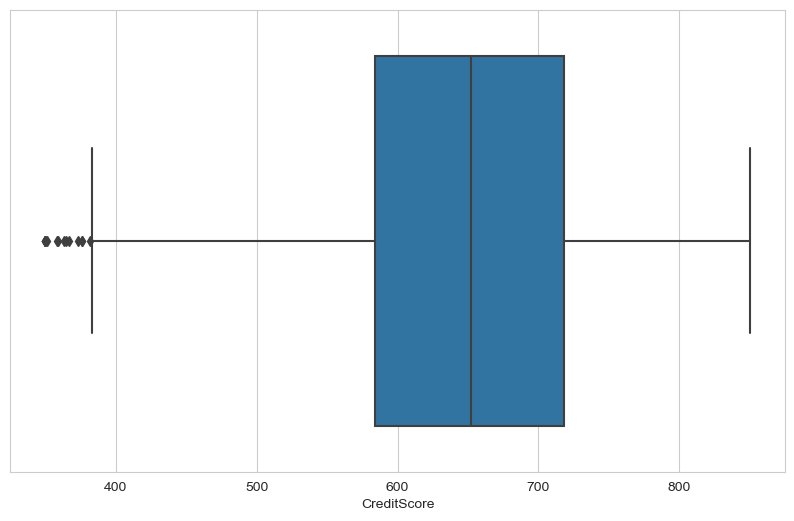

In [10]:
sns.boxplot(df.CreditScore);

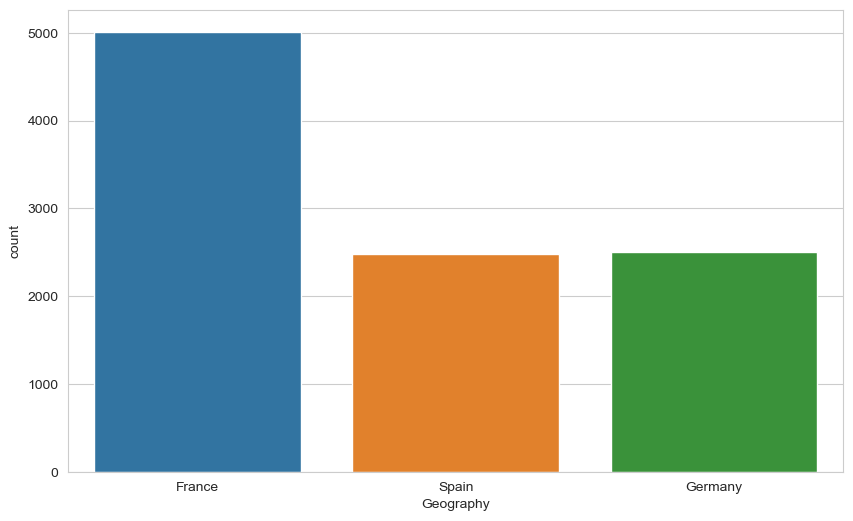

In [11]:
sns.countplot(df.Geography);

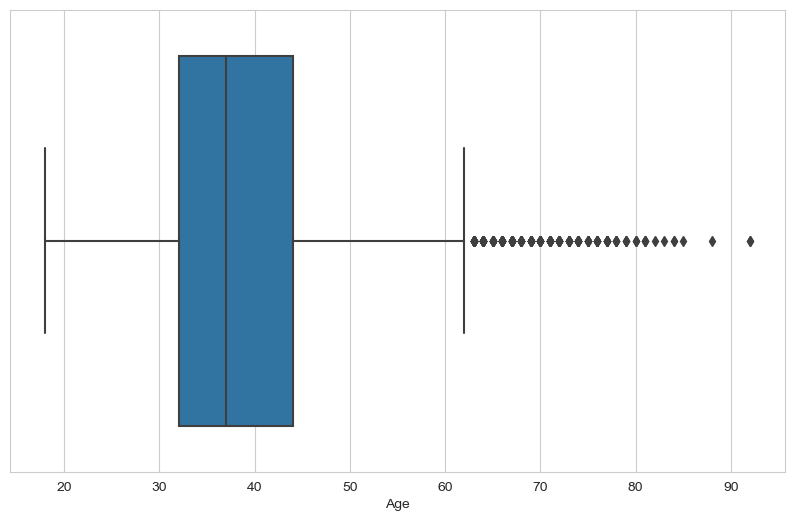

In [12]:
sns.boxplot(df.Age);

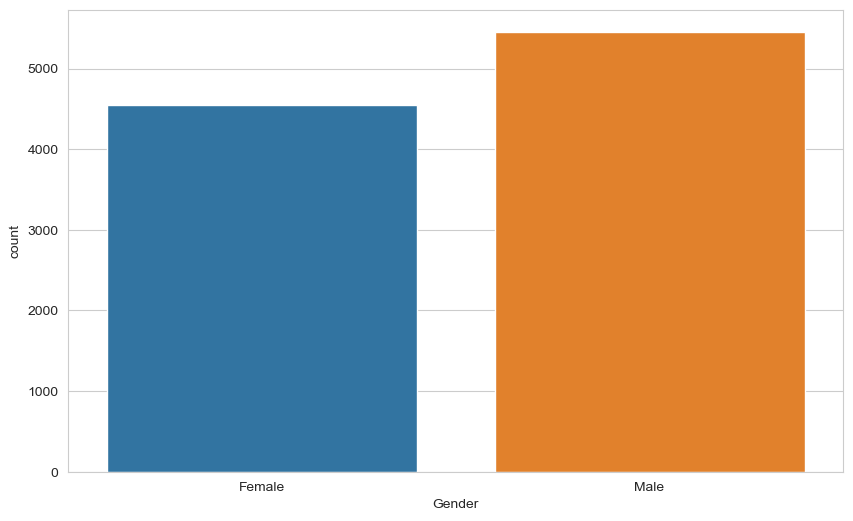

In [13]:
sns.countplot(df.Gender);

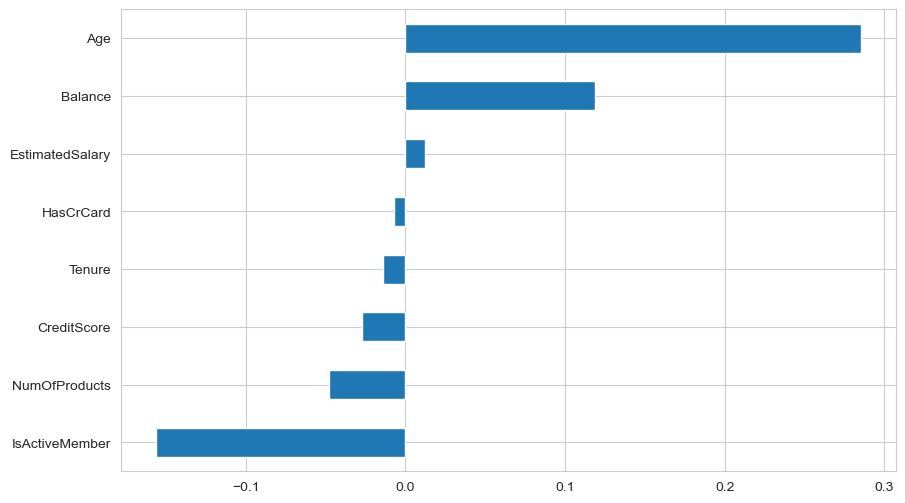

In [14]:
df.corr()["Exited"].sort_values().drop("Exited").plot(kind = "barh");

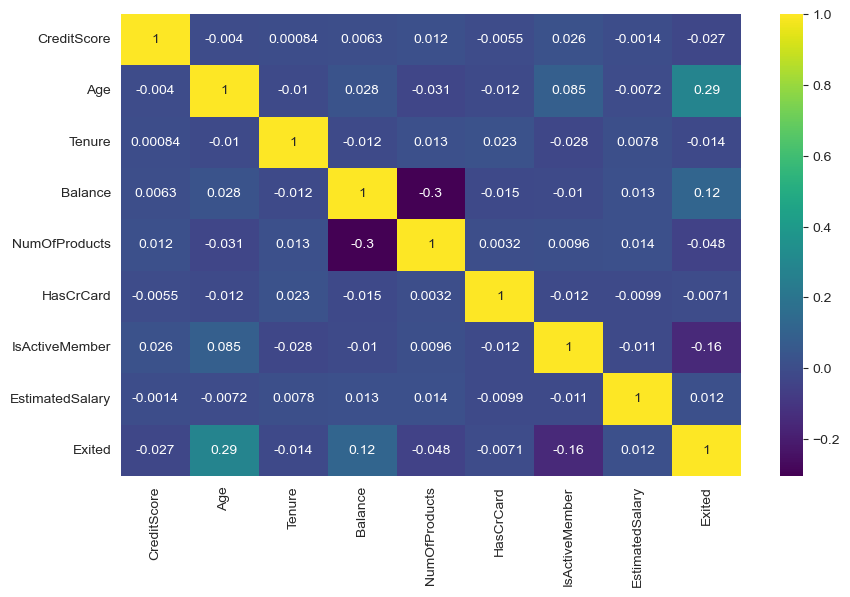

In [15]:
sns.heatmap(df.corr(),annot=True,cmap="viridis");

# Preprocessing of Data
- Train | Test Split, Scalling

In [35]:
X=df.drop("Exited",axis=1)
y=df.Exited

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (8000, 10)
Train target shape   :  (8000,)
Test features shape  :  (2000, 10)
Test target shape    :  (2000,)


In [39]:
from sklearn.preprocessing import OrdinalEncoder

In [40]:
enc=OrdinalEncoder()

In [41]:
categoric = X_train.select_dtypes("object").columns
categoric

Index(['Geography', 'Gender'], dtype='object')

In [42]:
X_train[categoric]

,Geography,Gender
6861,Spain,Male
9881,Spain,Female
4536,France,Female
8430,France,Female
6765,France,Female
...,...,...
599,Germany,Female
5695,France,Male
8006,Germany,Male
1361,France,Male


In [43]:
enc.fit_transform(X_train[categoric])

array([[2., 1.],
       [2., 0.],
       [0., 0.],
       ...,
       [1., 1.],
       [0., 1.],
       [2., 0.]])

In [44]:
X_train[categoric]=enc.fit_transform(X_train[categoric])

In [45]:
X_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6861,605,2.000,1.000,41,5,103154.660,1,0,0,143203.780
9881,687,2.000,0.000,40,1,0.000,2,1,0,8207.360
4536,642,0.000,0.000,55,7,0.000,2,1,1,101515.760
8430,612,0.000,0.000,38,7,110615.470,1,1,1,193502.930
6765,461,0.000,0.000,40,7,0.000,2,1,0,176547.800


In [46]:
X_train.Geography.value_counts()

0.000    4042
1.000    1988
2.000    1970
Name: Geography, dtype: int64

In [47]:
X_train.Gender.value_counts()

1.000    4359
0.000    3641
Name: Gender, dtype: int64

In [48]:
X_test[categoric]=enc.transform(X_test[categoric])

In [49]:
X_test.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
6676,619,2.000,1.000,52,8,0.000,2,1,1,123242.110
6421,616,0.000,1.000,23,8,73112.950,1,1,1,62733.050
9834,516,0.000,0.000,46,6,62212.290,1,0,1,171681.860
8492,494,0.000,1.000,28,9,114731.760,2,0,1,79479.740
9982,655,1.000,0.000,46,7,137145.120,1,1,0,115146.400


scaling

In [50]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
scaler = MinMaxScaler()

In [52]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
 
    

In [59]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [60]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\nmae:", mae, "\nmse:", mse, "\nrmse:", rmse)

In [61]:
X_train.shape

(8000, 10)

In [62]:
model= Sequential()

model.add(Dense(16,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(8,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["Recall"])

In [63]:
model.fit(X_train,y_train,validation_split=0.1,batch_size=32,epochs=100,verbose=1)

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5968 - recall: 0.1003 - val_loss: 0.4576 - val_recall: 0.0000e+00
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4767 - recall: 0.0115 - val_loss: 0.4307 - val_recall: 0.0145
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4580 - recall: 0.0549 - val_loss: 0.4179 - val_recall: 0.0507
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4482 - recall: 0.1084 - val_loss: 0.4104 - val_recall: 0.1304
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4399 - recall: 0.1457 - val_loss: 0.3966 - val_recall: 0.0870
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4302 - recall: 0.1816 - val_loss: 0.3924 - val_recall: 0.2391
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4182 - recall: 0.2202 - val_loss: 0.3721 - val_recall: 0.2319
Epoch 8/100
225/225 [==

225/225 [==============================] - 0s 2ms/step - loss: 0.3487 - recall: 0.4377 - val_loss: 0.3373 - val_recall: 0.4203
Epoch 60/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3473 - recall: 0.4390 - val_loss: 0.3353 - val_recall: 0.3986
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3491 - recall: 0.4336 - val_loss: 0.3350 - val_recall: 0.3841
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3473 - recall: 0.4350 - val_loss: 0.3364 - val_recall: 0.4058
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3471 - recall: 0.4444 - val_loss: 0.3361 - val_recall: 0.3333
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3477 - recall: 0.4363 - val_loss: 0.3410 - val_recall: 0.3406
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3461 - recall: 0.4343 - val_loss: 0.3471 - val_recall: 0.4565
Epoch 66/100
225/225 [===========

In [69]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                176       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 353
Trainable params: 353
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.weights

[<tf.Variable 'dense/kernel:0' shape=(10, 16) dtype=float32, numpy=
 array([[ 0.05990052,  0.27523354,  0.31476498, -0.72257775,  0.22540586,
          0.13007411, -0.09505184, -0.23821907,  0.20881261, -0.14833003,
         -0.04716197,  0.2724106 ,  0.23229739,  0.169292  ,  0.30820945,
          0.32478794],
        [ 0.20339845,  0.11478478, -0.38163102, -0.4262148 ,  0.49486154,
          0.00397292,  0.10317486, -0.17330578,  0.17865786, -0.20726332,
          0.7023794 , -0.1908918 , -0.2586385 , -0.20745763,  0.07366681,
         -0.1721837 ],
        [ 0.27643615,  0.26658675,  0.60607207,  0.2965457 ,  0.22536209,
          0.28048062, -0.10405407, -0.28780824,  0.13828088, -0.90992814,
          0.20243171,  0.18875434, -0.17874028,  0.26934713,  0.01262607,
          0.05924848],
        [ 1.1900288 ,  0.83530563, -0.39397293, -0.77601993,  0.20036744,
          0.7037452 ,  0.30735675,  0.04706728, -1.3100045 , -0.3857852 ,
         -0.8046235 , -0.76854277, -0.19645074,  

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [71]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve,precision_recall_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

In [72]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

,loss,recall,val_loss,val_recall
0,0.597,0.100,0.458,0.000
1,0.477,0.012,0.431,0.014
2,0.458,0.055,0.418,0.051
3,0.448,0.108,0.410,0.130
4,0.440,0.146,0.397,0.087


<AxesSubplot:>

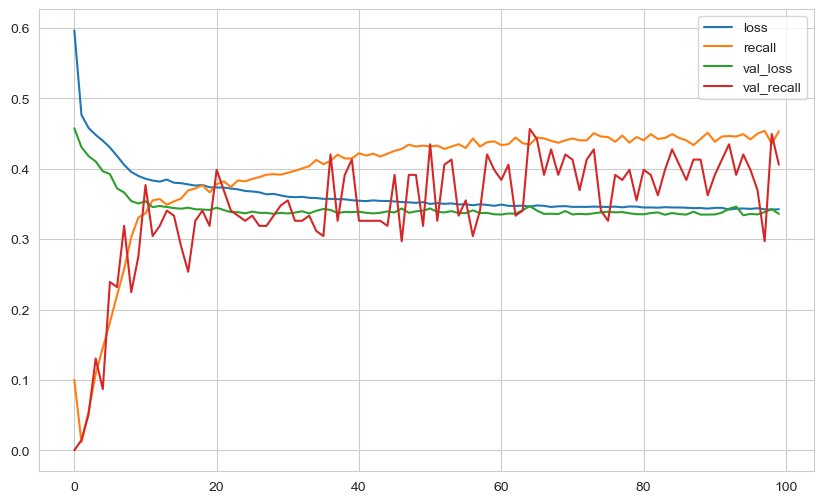

In [73]:
loss_df.plot()

In [74]:
model.evaluate(X_test, y_test, verbose=0)

[0.3290243446826935, 0.5413711667060852]

In [75]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.3290243446826935
accuracy :  0.5413711667060852


In [76]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1502   75]
 [ 194  229]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1577
           1       0.75      0.54      0.63       423

    accuracy                           0.87      2000
   macro avg       0.82      0.75      0.77      2000
weighted avg       0.86      0.87      0.86      2000



63/63 [==============================] - 0s 1ms/step


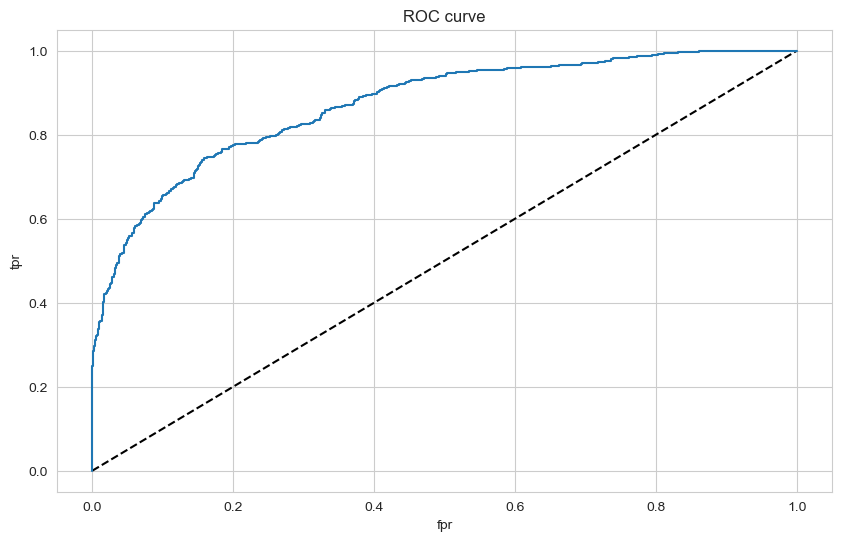

In [77]:
y_pred_proba = model.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

### Create The Model

In [78]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam

In [79]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu",))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.001)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [80]:
from sklearn.utils import class_weight

In [81]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

In [82]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6263701847792045, 1: 2.4783147459727384}

In [83]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1 )

Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6875 - recall: 0.5129 - val_loss: 0.6255 - val_recall: 0.5797
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.6459 - recall: 0.6633 - val_loss: 0.6012 - val_recall: 0.6377
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.6225 - recall: 0.6829 - val_loss: 0.5857 - val_recall: 0.6377
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5996 - recall: 0.7053 - val_loss: 0.5963 - val_recall: 0.6884
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5783 - recall: 0.7283 - val_loss: 0.5633 - val_recall: 0.6957
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5589 - recall: 0.7439 - val_loss: 0.5049 - val_recall: 0.6159
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5467 - recall: 0.7432 - val_loss: 0.5064 - val_recall: 0.6449
Epoch 8/100
225/225 [======

225/225 [==============================] - 0s 2ms/step - loss: 0.4715 - recall: 0.7798 - val_loss: 0.4334 - val_recall: 0.6667
Epoch 60/100
225/225 [==============================] - 1s 2ms/step - loss: 0.4716 - recall: 0.7798 - val_loss: 0.4152 - val_recall: 0.6377
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4720 - recall: 0.7751 - val_loss: 0.4605 - val_recall: 0.7101
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4689 - recall: 0.7771 - val_loss: 0.5656 - val_recall: 0.7971
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4727 - recall: 0.7764 - val_loss: 0.4680 - val_recall: 0.7101
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4709 - recall: 0.7778 - val_loss: 0.4474 - val_recall: 0.7029
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4702 - recall: 0.7703 - val_loss: 0.4290 - val_recall: 0.6739
Epoch 66/100
225/225 [===========

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [95]:
loss_df = pd.DataFrame(model.history.history)
loss_df

,loss,recall,val_loss,val_recall
0,0.658,0.596,0.594,0.638
1,0.605,0.689,0.579,0.645
2,0.578,0.701,0.529,0.580
3,0.559,0.715,0.597,0.761
4,0.545,0.728,0.452,0.572
...,...,...,...,...
95,0.446,0.772,0.435,0.703
96,0.446,0.778,0.417,0.667
97,0.447,0.775,0.402,0.609
98,0.450,0.778,0.490,0.739


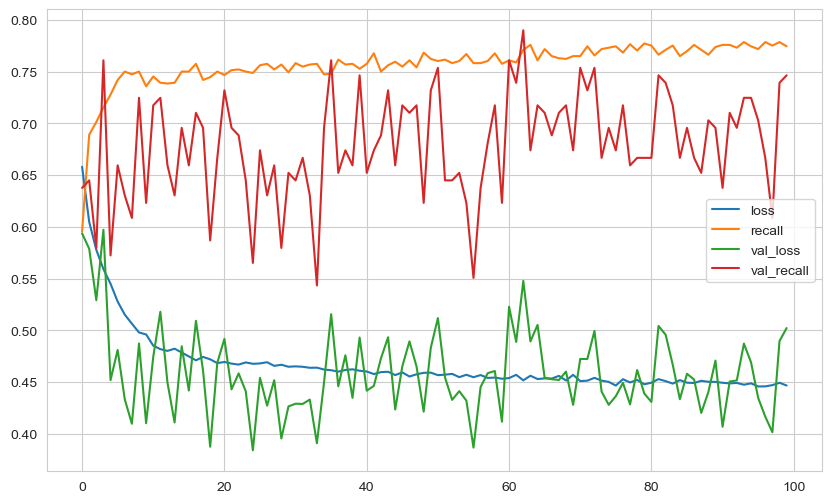

In [96]:
loss_df.plot();

In [97]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.5054946541786194
accuracy :  0.813238799571991


In [98]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1168  409]
 [  79  344]]
              precision    recall  f1-score   support

           0       0.94      0.74      0.83      1577
           1       0.46      0.81      0.59       423

    accuracy                           0.76      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.76      0.78      2000



In [99]:
y_pred_proba = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


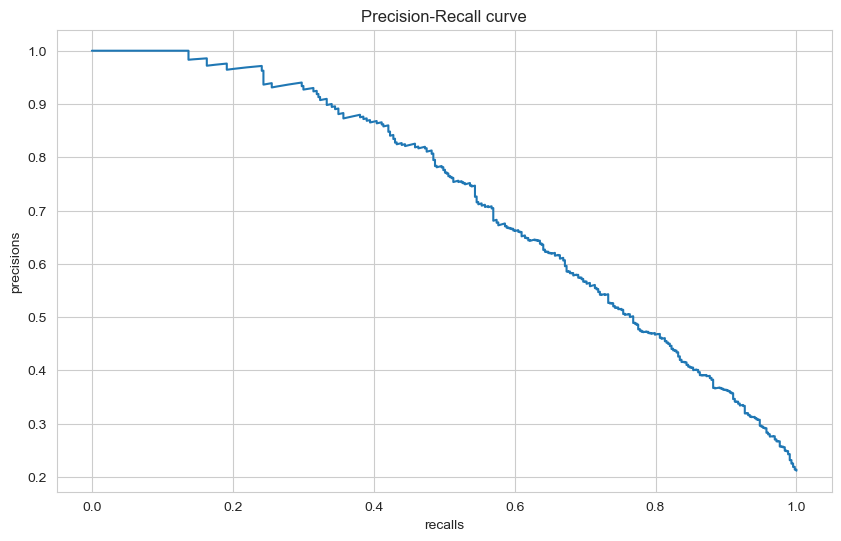

In [100]:
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [101]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = Adam(lr = 0.003)
model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [102]:
class_weights = class_weight.compute_class_weight("balanced",
                                                  classes=np.unique(y_train),
                                                  y=y_train)

In [103]:
class_weights = {0: class_weights[0], 1: class_weights[1]}
class_weights

{0: 0.6263701847792045, 1: 2.4783147459727384}

In [104]:
model.fit(X_train, y_train, class_weight=class_weights,validation_split = 0.1, batch_size = 32, epochs = 100, verbose=1 )

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.6747 - recall: 0.6118 - val_loss: 0.5790 - val_recall: 0.4420
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.6188 - recall: 0.6640 - val_loss: 0.6558 - val_recall: 0.7609
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5848 - recall: 0.7127 - val_loss: 0.5173 - val_recall: 0.5725
Epoch 4/100
225/225 [==============================] - 1s 2ms/step - loss: 0.5496 - recall: 0.7344 - val_loss: 0.5420 - val_recall: 0.7536
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5259 - recall: 0.7344 - val_loss: 0.4421 - val_recall: 0.6014
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5216 - recall: 0.7500 - val_loss: 0.5617 - val_recall: 0.8116
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.5134 - recall: 0.7446 - val_loss: 0.5059 - val_recall: 0.7246
Epoch 8/100
225/225 [======

225/225 [==============================] - 0s 2ms/step - loss: 0.4545 - recall: 0.7554 - val_loss: 0.4396 - val_recall: 0.6522
Epoch 60/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4537 - recall: 0.7554 - val_loss: 0.4627 - val_recall: 0.6812
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4567 - recall: 0.7588 - val_loss: 0.3968 - val_recall: 0.5580
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4525 - recall: 0.7554 - val_loss: 0.4842 - val_recall: 0.7029
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4519 - recall: 0.7602 - val_loss: 0.4789 - val_recall: 0.6957
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4534 - recall: 0.7581 - val_loss: 0.4407 - val_recall: 0.6594
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4527 - recall: 0.7480 - val_loss: 0.4471 - val_recall: 0.6739
Epoch 66/100
225/225 [===========

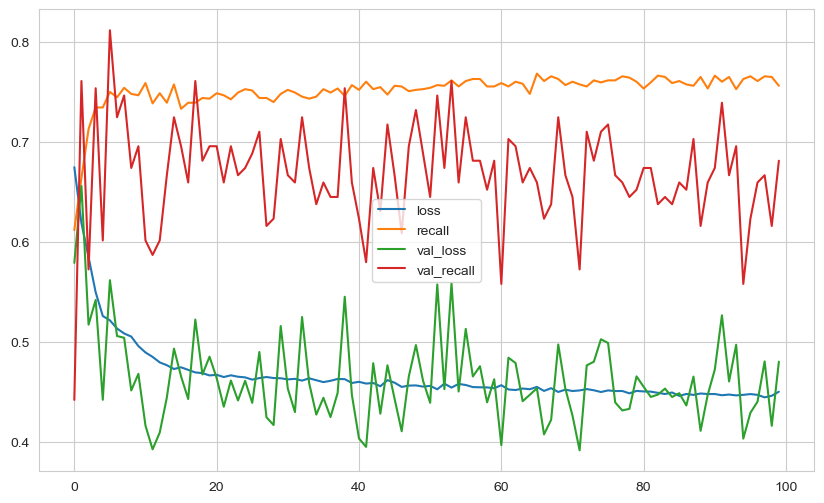

In [105]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot();

In [106]:
y_pred = (model.predict(X_test) > 0.5)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1272  305]
 [  96  327]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.86      1577
           1       0.52      0.77      0.62       423

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.80      0.81      2000



63/63 [==============================] - 0s 1ms/step


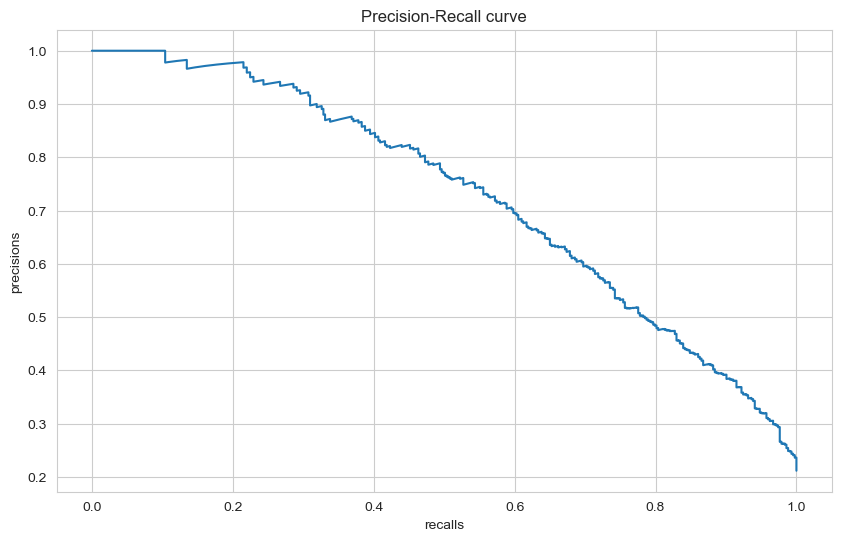

In [107]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

### Add Dropout Layer

In [108]:
from tensorflow.keras.layers import Dropout

In [109]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32,class_weight=class_weights, epochs = 100, verbose = 1)

Epoch 1/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4449 - recall: 0.7629 - val_loss: 0.4552 - val_recall: 0.6449
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4449 - recall: 0.7595 - val_loss: 0.4670 - val_recall: 0.6812
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4466 - recall: 0.7547 - val_loss: 0.4616 - val_recall: 0.6739
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4454 - recall: 0.7683 - val_loss: 0.4843 - val_recall: 0.6884
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4449 - recall: 0.7622 - val_loss: 0.5003 - val_recall: 0.6884
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4436 - recall: 0.7608 - val_loss: 0.4604 - val_recall: 0.6594
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4482 - recall: 0.7608 - val_loss: 0.4638 - val_recall: 0.6449
Epoch 8/100
225/225 [======

225/225 [==============================] - 0s 2ms/step - loss: 0.4386 - recall: 0.7683 - val_loss: 0.4750 - val_recall: 0.6884
Epoch 60/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4387 - recall: 0.7663 - val_loss: 0.5128 - val_recall: 0.7029
Epoch 61/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4375 - recall: 0.7642 - val_loss: 0.4618 - val_recall: 0.6884
Epoch 62/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4403 - recall: 0.7608 - val_loss: 0.4478 - val_recall: 0.6594
Epoch 63/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4381 - recall: 0.7642 - val_loss: 0.4787 - val_recall: 0.6739
Epoch 64/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4380 - recall: 0.7751 - val_loss: 0.4650 - val_recall: 0.6812
Epoch 65/100
225/225 [==============================] - 0s 2ms/step - loss: 0.4356 - recall: 0.7696 - val_loss: 0.4251 - val_recall: 0.6449
Epoch 66/100
225/225 [===========

<AxesSubplot:>

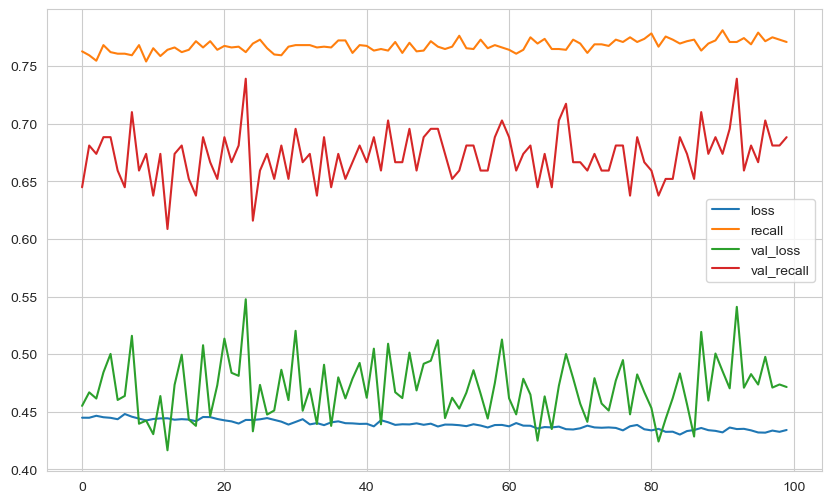

In [110]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [111]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

63/63 [==============================] - 0s 1ms/step
[[1256  321]
 [  94  329]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1577
           1       0.51      0.78      0.61       423

    accuracy                           0.79      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.84      0.79      0.81      2000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [112]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [113]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 100, callbacks = [early_stop])

Epoch 1/100
225/225 [==============================] - 1s 2ms/step - loss: 0.3308 - recall: 0.5196 - val_loss: 0.3613 - val_recall: 0.4565
Epoch 2/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3215 - recall: 0.5264 - val_loss: 0.3536 - val_recall: 0.4203
Epoch 3/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3207 - recall: 0.5224 - val_loss: 0.3654 - val_recall: 0.4493
Epoch 4/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3192 - recall: 0.5285 - val_loss: 0.3553 - val_recall: 0.3696
Epoch 5/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3208 - recall: 0.5203 - val_loss: 0.3610 - val_recall: 0.4565
Epoch 6/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3191 - recall: 0.5169 - val_loss: 0.3568 - val_recall: 0.4203
Epoch 7/100
225/225 [==============================] - 0s 2ms/step - loss: 0.3176 - recall: 0.5217 - val_loss: 0.3642 - val_recall: 0.4203
Epoch 8/100
225/225 [======

#### Monitor the "val_recall" as metric

<AxesSubplot:>

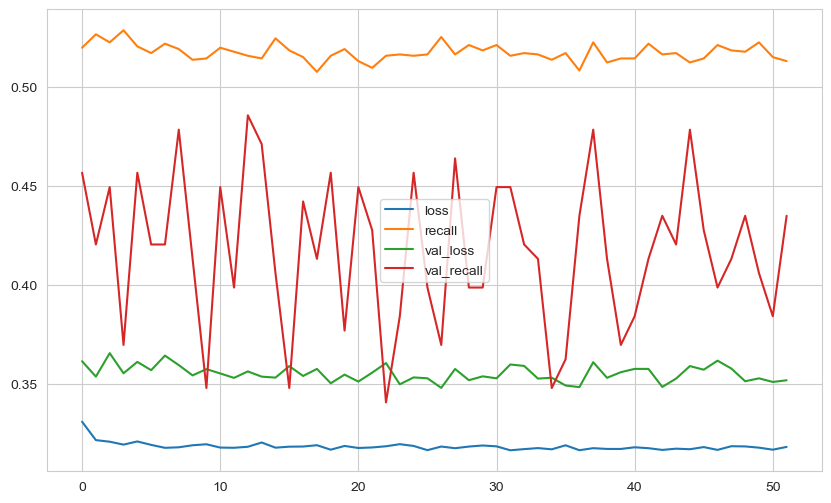

In [114]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

## GridSearchCV

In [115]:
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [116]:
def build_classifier(optimizer,learn_rate):
    classifier = Sequential()
    classifier.add(Dense(units=16, activation='relu'))
    classifier.add(Dense(units=8, activation='relu'))
    classifier.add(Dense(units=1, activation='sigmoid'))
    classifier.compile(optimizer=optimizer(learn_rate),
                       loss='binary_crossentropy',
                       metrics=['Recall'])
    return classifier

In [120]:
class_weights

{0: 0.6263701847792045, 1: 2.4783147459727384}

In [121]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
classifier_model = KerasClassifier(build_fn = build_classifier, validation_split = 0.1, epochs = 100)

parameters = {'batch_size': [32, 64, 128],
              'optimizer': [Adam, RMSprop, Adadelta, Nadam],
              'learn_rate': [0.001, 0.003, 0.005]}

grid_model = GridSearchCV(estimator = classifier_model,
                          param_grid = parameters,
                          scoring = 'recall',
                          cv = 10,
                          n_jobs = -1,
                          verbose = 1)

grid_model.fit(X_train, y_train,class_weight=class_weights, callbacks = [early_stop])

Fitting 10 folds for each of 36 candidates, totalling 360 fits


In [ ]:
grid_model.best_score_

In [ ]:
grid_model.best_params_

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [ ]:
y_pred = grid_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_pred_proba = grid_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

# Final Model and Model Deployment

In [ ]:
import pickle

pickle.dump(scaler, open("scaler_churn", 'wb'))

In [ ]:
model = Sequential()

model.add(Dense(16, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(8, activation = "relu"))
model.add(Dense(4, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

opt = RMSprop(lr=0.001)

model.compile(optimizer = opt, loss = "binary_crossentropy", metrics = ["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25, restore_best_weights = True)

In [ ]:
model.fit(x=X_train,
          y=y_train,
          validation_data=(X_test, y_test), 
          callbacks=[early_stop],
          batch_size=128,
          epochs=100,
          verbose=1,
          class_weight=class_weights) 

In [ ]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot()

In [ ]:
y_pred = model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
model.save('model_churn')

## Prediction

In [ ]:
data =df.copy()


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
enc=OrdinalEncoder()

In [ ]:
categoric = data.select_dtypes("object").columns
categoric

In [ ]:
data[categoric]

In [ ]:
enc.fit_transform(data[categoric])

In [ ]:
data[categoric]=enc.fit_transform(data[categoric])

In [ ]:
data_df = pd.DataFrame(data)

In [ ]:
prediction= data_df.drop(columns="Exited").iloc[101]
prediction

In [ ]:
prediction=scaler.transform(prediction.values.reshape(-1, 10))

In [ ]:
y_pred =(model.predict(prediction) > 0.5).astype("int32")
y_pred

In [ ]:
data_df["Exited"].iloc[101]

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___